# 🛳️ Titanic Survival Prediction - Exploratory Data Analysis

## 📌 Step 1: Import Libraries
We'll use pandas for data handling.

In [2]:
import pandas as pd

## 📥 Step 2: Load Dataset
Loading the Titanic dataset from the `data` folder.

In [8]:
df = pd.read_csv("data/train.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔍 Step 3: Dataset Overview
Let's check basic info, null values, and summary statistics.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 💀 Step 4: Survival Rate Overview
Let's understand how many passengers survived vs didn't.


In [13]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

## 👨‍👩‍👧 Step 5: Survival by Gender
Let's see how survival chances differed between males and females.

In [14]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## 📊 Step 6: Visualization - Survival by Gender
Let's visualize the number of survivors and non-survivors by gender using a bar chart.

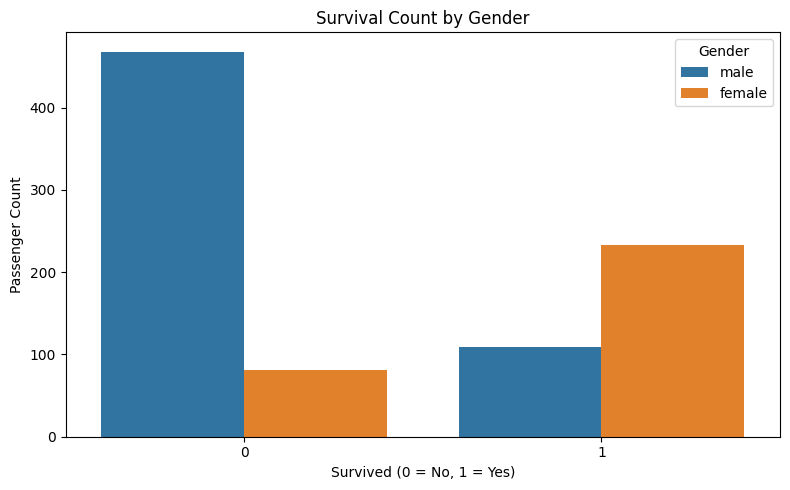

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title("Survival Count by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("images/survival_by_gender.png")
plt.show()

## 🪑 Step 7: Survival by Passenger Class
Let's visualize how passenger class affected survival rates.

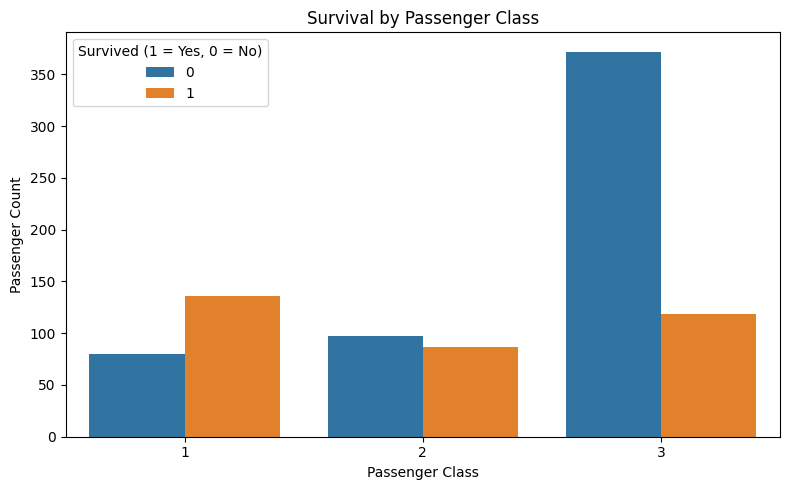

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Passenger Count")
plt.legend(title="Survived (1 = Yes, 0 = No)")
plt.tight_layout()
plt.savefig("images/survival_by_class.png")
plt.show()

## 👶 Step 8: Age Distribution by Survival
Now let's compare the age distribution of passengers who survived vs those who didn’t.

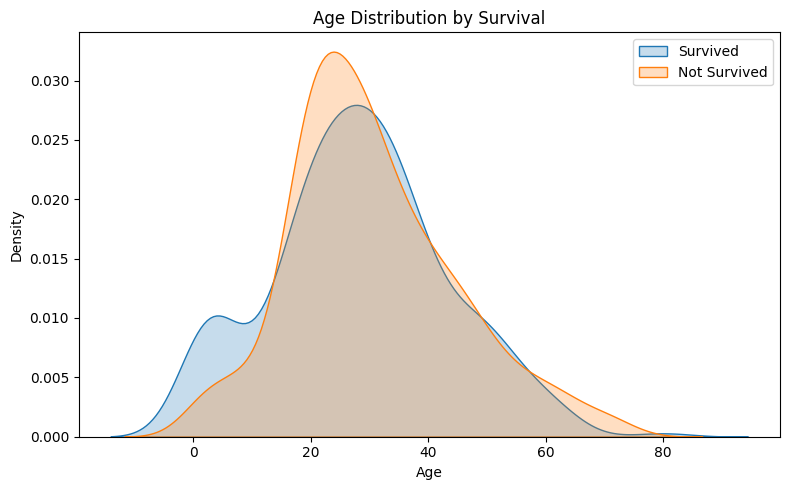

In [20]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df.Survived == 1], x='Age', label='Survived', fill=True)
sns.kdeplot(data=df[df.Survived == 0], x='Age', label='Not Survived', fill=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.savefig("images/age_distribution.png")
plt.show()

## 🧼 Step 9: Data Cleaning – Handling Missing Values
Let's handle missing values in Age, Cabin, and Embarked columns before model building.

In [23]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# Fill missing Age with median
if df['Age'].isnull().sum() > 0:
    df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop Cabin only if it exists
if 'Cabin' in df.columns:
    df = df.drop('Cabin', axis=1)

# Fill missing Embarked with mode
if df['Embarked'].isnull().sum() > 0:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Recheck missing values
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 🔠 Step 10: Encoding Categorical Columns
We will convert the categorical features like 'Sex' and 'Embarked' into numeric values using label encoding and one-hot encoding.


In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' column using LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male → 1, female → 0

# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Check updated dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


## ✂️ Step 11: Feature Selection and Train-Test Split
We will select the most relevant features and split the data into training and testing sets.


In [28]:
from sklearn.model_selection import train_test_split

# Select features (independent variables)
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']]

# Target variable (dependent)
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Check shapes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (712, 8)
Testing set size: (179, 8)


## 🤖 Step 12: Logistic Regression Model
We will train a logistic regression model to predict survival on the Titanic using our cleaned data.


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Increased max_iter to help it converge
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 81.01 %


## 📉 Step 13: Model Evaluation
We will now evaluate the model using a confusion matrix and classification report to understand its performance.


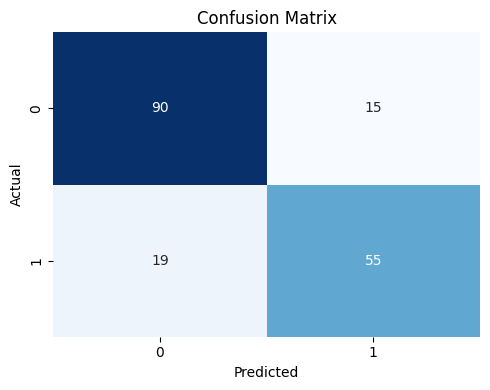

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("images/confusion_matrix.png")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


## 💾 Step 14: Saving and Loading the Model
We will save our trained model using Pickle and later load it to make predictions.


In [32]:
import pickle

# Save the trained model
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the saved model
with open('titanic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test loaded model on test set
loaded_preds = loaded_model.predict(X_test)

# Confirm same accuracy
print("Loaded Model Accuracy:", round(accuracy_score(y_test, loaded_preds) * 100, 2), "%")


Loaded Model Accuracy: 81.01 %
